### 3'UTR analysis
The three prime untranslated region (3'-UTR) is the section of messenger RNA (mRNA) that immediately follows the translation termination codon. The 3'-UTR often contains regulatory regions that post-transcriptionally influence gene expression, such as [microRNA (miRNA)](https://en.wikipedia.org/wiki/MicroRNA) binding sites.
![](figures/640px-MRNA_structure.svg.png)
(Adapted from Wikipedia: https://en.wikipedia.org/wiki/Three_prime_untranslated_region)

We start by importing the necessary packages

In [79]:
import os #directories package
import pandas as pd #pandas package similar to R dataframe
import matplotlib.pyplot as plt # Import matplotlib.pyplot as plt
import numpy as np
import random
random.seed(30)

In [80]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install progressbar
from progressbar import ProgressBar

Set up here where the 3'UTR and miRNA data are located in your local directory

In [81]:
#Change current directory in Python
os.chdir("/Users/bofillderosf/biof309_xbdr86_utr/")
print("Current Working Directory " , os.getcwd())

Current Working Directory  /Users/bofillderosf/biof309_xbdr86_utr


Load the 3'UTR sequences

In [82]:
utr = pd.read_csv('mini_UTR_set.tsv', sep='\t', names = ["Gene", "Sequence"])
utr.head(n=4)

,Gene,Sequence
0,CCDC73,GGGGAUUGGUGUUUUUGGGAAUAAAAUGUGACAUUUAUAGUGAAAA...
1,NIPAL3,GACUCGCCUCCCUCUAUUUAUAACUGUCCCCUCCAGGCUGACAGUG...
2,AKR1B1,AGCUGUGGUUGCCUGCUCGUCCCCAAGUGACCUAUACCUGUGUUUC...
3,CTD-2330K9.3,UCUGGGGAUUUUCUAGGCCCCCAGUCCCAUCCAUCAGGACAAUCAA...


In [83]:
mirna = pd.read_csv('miRNA_target_seed.tsv', sep='\t')
#mirna = mirna.sample(n=200)
mirna.head(n=4)

,SEED,rev_compl
0,TGTACAG,CUGUACA
1,TATACAA,UUGUAUA
2,TGTACAA,UUGUACA
3,TATACGA,UCGUAUA


The analysis performed is the mapping of miRNA seed sites, where miRNA bind by base-pair complementarity

In [84]:
#define motif
import re
# importing module for regex 
utr["Len_UTR"]= utr["Sequence"].str.len()/1000
utr.head(n=4)

,Gene,Sequence,Len_UTR
0,CCDC73,GGGGAUUGGUGUUUUUGGGAAUAAAAUGUGACAUUUAUAGUGAAAA...,3.627
1,NIPAL3,GACUCGCCUCCCUCUAUUUAUAACUGUCCCCUCCAGGCUGACAGUG...,3.798
2,AKR1B1,AGCUGUGGUUGCCUGCUCGUCCCCAAGUGACCUAUACCUGUGUUUC...,0.941
3,CTD-2330K9.3,UCUGGGGAUUUUCUAGGCCCCCAGUCCCAUCCAUCAGGACAAUCAA...,0.324


In [85]:
motifs = mirna['rev_compl']
pbar = ProgressBar() #progress bar not to get impatient with the miRNA site search
for motif in pbar(motifs):
    search = utr["Sequence"].str.count(motif, re.I)
    utr[motif] = search
utr.head(n=4)

100% |########################################################################|


,Gene,Sequence,Len_UTR,CUGUACA,UUGUAUA,UUGUACA,UCGUAUA,CCGUAUA,CUGUAUA,UUGCGCA,...,CAGCCAU,UCCAAGU,UCUGAAU,ACCAAAG,CCCAACC,CCCCACC,CCGUCCC,AGUAGAC,AGAGAAG,UUUAUUG
0,CCDC73,GGGGAUUGGUGUUUUUGGGAAUAAAAUGUGACAUUUAUAGUGAAAA...,3.627,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,NIPAL3,GACUCGCCUCCCUCUAUUUAUAACUGUCCCCUCCAGGCUGACAGUG...,3.798,0,1,0,0,0,0,0,...,0,0,0,2,0,0,0,0,2,0
2,AKR1B1,AGCUGUGGUUGCCUGCUCGUCCCCAAGUGACCUAUACCUGUGUUUC...,0.941,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,CTD-2330K9.3,UCUGGGGAUUUUCUAGGCCCCCAGUCCCAUCCAUCAGGACAAUCAA...,0.324,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [86]:
#print("Maximums in each variable:")
#print(utr.max(axis=0))
utr.describe()

,Len_UTR,CUGUACA,UUGUAUA,UUGUACA,UCGUAUA,CCGUAUA,CUGUAUA,UUGCGCA,ACAUUCC,CAAGCUU,...,CAGCCAU,UCCAAGU,UCUGAAU,ACCAAAG,CCCAACC,CCCCACC,CCGUCCC,AGUAGAC,AGAGAAG,UUUAUUG
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.680040,0.131533,0.228067,0.181667,0.012400,0.010000,0.141467,0.009667,0.129867,0.090133,...,0.152600,0.128333,0.200000,0.14280,0.118867,0.315733,0.043867,0.058867,0.249067,0.319533
std,1.869964,0.392737,0.588848,0.494382,0.132089,0.101492,0.424891,0.099200,0.390143,0.317725,...,0.432503,0.395315,0.518348,0.43881,0.388434,0.769471,0.270704,0.254701,0.591148,0.716100
min,0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.351000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.008000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.416000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,24.505000,4.000000,11.000000,10.000000,9.000000,2.000000,7.000000,2.000000,4.000000,4.000000,...,6.000000,5.000000,6.000000,14.00000,10.000000,12.000000,17.000000,4.000000,7.000000,10.000000


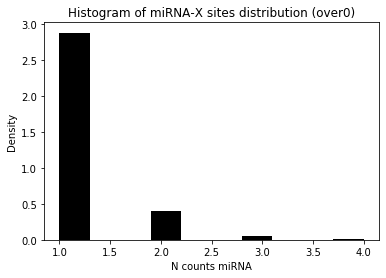

In [87]:
frequencies = utr.iloc[:, 3]
plt.hist(frequencies, density=True, range=(1, frequencies.max()),color='black') #avoid plot UTRs with 0 counts
plt.title("Histogram of miRNA-X sites distribution (over0)")
plt.ylabel('Density')
plt.xlabel('N counts miRNA')
plt.show()

## t-SNE implementation to detect 3'UTRs with similar miRNA regulation 

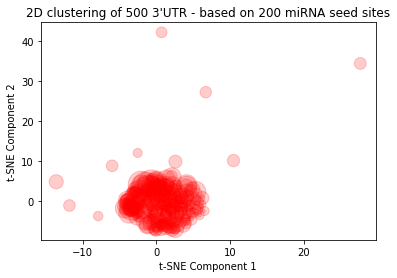

In [88]:
# Import clustering package
from sklearn.manifold import TSNE

# Create a TSNE instance: model
tsne = TSNE(learning_rate=50) 

#Subset data miRNA sites
all_samples = utr.iloc[:, 3:]
subset_samples = all_samples.sample(n=500)
label = subset_samples.sum(axis=1) #define lables by number of total sites

# Apply fit_transform to samples: tsne_features
tsne_features = tsne.fit_transform(subset_samples)

# Select component 1
xs = tsne_features[:,0]

# Select component 2
ys = tsne_features[:,1]

# Scatter plot by component 1 and 2
plt.scatter(xs, ys, alpha=0.2, c="red", s=label) 
plt.title("2D clustering of 500 3'UTR - based on 200 miRNA seed sites")
plt.ylabel('t-SNE Component 2')
plt.xlabel('t-SNE Component 1')
plt.show()